In [3]:
from seaborn.rcmod import plotting_context
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
# Numbers between 0 and 9 (including)
X_digit, y_digit = load_digits(return_X_y = True)

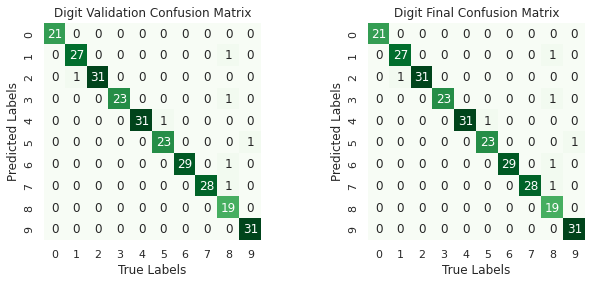


Random Forest Classifier Digit Accuracy Results:
------------------------------------------------
Validation Test Accuracy: 0.97
Final Test Accuracy: 0.97


In [26]:
# Create the validation, training, and testing data sets
X_train, X_remain, y_train, y_remain = train_test_split(X_digit, y_digit, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size = 0.5)

# Validation
Random_Forest_Val = RandomForestClassifier()
Random_Forest_Val.fit(X_train, y_train)
y_hat_val = Random_Forest_Val.predict(X_val)

# Plot validation confusion matrix
plt.subplot(1,2,1)

CM_Val = confusion_matrix(y_val, y_hat_val)
                          
ax = sns.heatmap(CM_Val.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Greens")  

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Digit Validation Confusion Matrix")     

# Find the validation accuracy
Validation_Accuracy = round(accuracy_score(y_val,y_hat_val),2)

# Concatonate data for testing phase
X_final_train = np.concatenate((X_train, X_val))
y_final_train = np.concatenate((y_train, y_val))

# Final test
Random_Forest_Final = RandomForestClassifier()
Random_Forest_Final.fit(X_final_train, y_final_train)
y_hat_final = Random_Forest_Final.predict(X_test)

# Plot the test confusion matrix
plt.subplot(1,2,2)

CM_Final = confusion_matrix(y_val, y_hat_val)
                          
ax = sns.heatmap(CM_Final.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Greens")  

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Digit Final Confusion Matrix")     

plt.subplots_adjust(right = 1.5)
plt.show()

print("\nRandom Forest Classifier Digit Accuracy Results:\n"
      "------------------------------------------------")

# Print the accuracy results of both tests
print(f"Validation Test Accuracy: {Validation_Accuracy}")

final_accuracy = round(accuracy_score(y_test, y_hat_final),2)

print(f"Final Test Accuracy: {final_accuracy}")